[ 0.8512598  -0.74404922 -0.67719378 -1.248165    1.08035435  0.2002517
 -0.90930928  1.23294949 -1.27886539  0.24477764  0.01333158  0.18470539
  0.51413547  0.24580112 -0.83148263 -0.7212589   1.27555834  0.42652046
 -0.99314672  1.86388062]


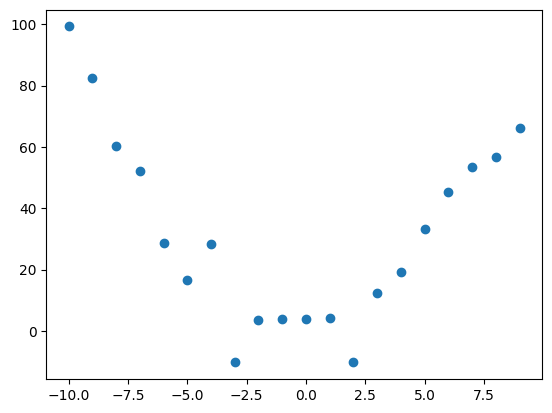

[2.38846525159712, -4.365184115161796, -4.791043974296889, 8.087035600865853, -1.6937568627792725, -3.4655070248952153, 4.7492440652119825, -0.15471533894959855, -6.40193273292319, 9.588080149463497, 6.281260235256887, -1.7551715096105518, 5.956256920402954, 6.049328742482132, 3.3398945667128466, -6.344496919710371, -8.913324776613159, 9.206530364117725, -1.1148173828033219, -2.4720090078973893]
[5.069979217956625, -1.7077015922335406, -3.3611872167794026, -0.6514196555106864, -2.4548875733383957, 2.027376256724626, -2.041779192105615, 3.7309631496837063, 7.844051186924915, 0.5602665024129223, 0.10590261157556746, -2.889927487310766, 0.6933010100956452, -4.095264587677652, 0.02663491297454712, -7.873421130321239, 0.32296843001719466, 1.2948914241362743, -5.4571788620665345, 6.821887025429334]


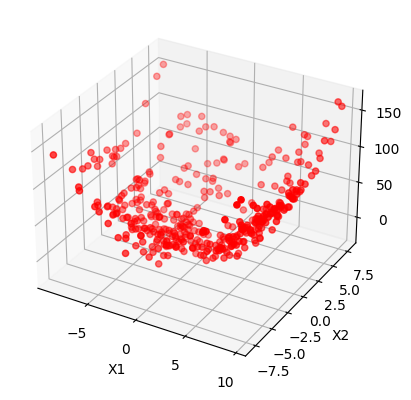

AttributeError: partially initialized module 'torchvision' has no attribute 'extension' (most likely due to a circular import)

In [10]:
# -*- coding: utf-8 -*-
"""딥러닝 데이터전처리.ipynb의 사본

Automatically generated by Colab.

Original file is located at
    https://colab.research.google.com/drive/1pg3WqZW7gPHeV2VB7nYWTfnUZZ1eBvnE
"""

import numpy as np
import matplotlib.pyplot as plt
import random

random.seed(2021)
X= range(-10,10)
Y =[value**2 for value in X]
print(np.random.normal(0, 1, 20))
Y_gauss = Y+np.random.normal(0, 10, 20)
plt.plot(X,Y_gauss,'o')
plt.show()

# Define the function
def f(x, y):
    return x**2 + y**2

#xs = np.linspace(-10, 10, 20)
#ys = np.linspace(-10, 10, 20)
xs = [np.random.uniform(-10,10) for _ in range(20)]
ys = [np.random.uniform(-10,10) for _ in range(20)]
print(xs)
print(ys)
X1,X2 = np.meshgrid(xs, ys) #연결 -> for문 2번 돌리는거를 행렬로 해서 병렬 처리 하기위해
F = f(X1, X2) + np.random.normal(0, 10, (20,20))
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the points
ax.scatter(X1, X2, F, c='r', marker='o')

# Set labels
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('F')

plt.show()

import pickle
import pandas as pd
from sklearn.model_selection import train_test_split
import random

import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init
import torchvision.datasets as dset
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
import matplotlib as mpl

learning_rate = 1e-4
batch_size = 100
epochs = 1000

# #data 만들기
# random.seed(2021)
# X= [np.random.uniform(-50,50) for _ in range(100)]
# X=torch.tensor(X,dtype=torch.float32)
# #print(X)
# Y =[value**3+2*value**2-1500*value+5 for value in X]
# #value**5+value**4+value**3+value**2+value+1

# Y_gauss = Y+np.random.normal(0, 8000, 100)
# Y_gauss = torch.tensor(Y_gauss,dtype=torch.float32)
# #print(Y_gauss)
# plt.plot(X,Y_gauss,'o')
# plt.show()
#data 만들기
random.seed(2021)
X= [np.random.uniform(-10,10) for _ in range(1, 80)]
X=torch.tensor(X,dtype=torch.float32)
#print(X)
Y =[0.01*(value+9)*((value-4)**3) for value in X]
#0.02*value**3-0.1*value**2+0.3*value+5
#value**5+value**4+value**3+value**2+value+1

Y_gauss = Y+np.random.normal(0, 4, 79)
Y_gauss = torch.tensor(Y_gauss,dtype=torch.float32)
#print(Y_gauss)
plt.plot(X,Y_gauss,'o')
plt.show()

X=X.unsqueeze(1)
Y_gauss = Y_gauss.unsqueeze(1)

#dataset tensor로 변환
X_train, X_test, y_train, y_test = train_test_split(X,Y_gauss, test_size=0.1, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train,y_train, test_size=1/9, random_state=42)
#dataset 나누기

print(X_train)
X_train.size()

train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)
val_dataset = TensorDataset(X_valid, y_valid)

"""2) Set DataLoader"""

dataloaders = {}
dataloaders['train'] = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
dataloaders['test'] = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
dataloaders['val'] = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# number of data/batch
len(dataloaders["test"])

"""#3. Model & Optimizer

1) Model
"""

#build neural network
class NeuralNetwork(nn.Module):
  def __init__(self):
     super().__init__()
     self.linear_relu_stack = nn.Sequential(
        nn.Linear(1,10000),
        nn.LeakyReLU(),
        nn.Linear(10000,5000),
        nn.LeakyReLU(),
        nn.Linear(5000, 1),
    )

  def forward(self, x):
    logits = self.linear_relu_stack(x)
    return logits

"""2) Loss func & Optimizer"""

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

model = NeuralNetwork().to(device)
loss_func = nn.MSELoss()
#optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
test_loss_history = []

def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        # prediction and loss calculation
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backward propagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")


def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item() #calculate test loss

    test_loss /= num_batches
    test_loss_history.append(test_loss)
    #print(f"Test Error: Avg loss: {test_loss:>8f} \n")

for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(dataloaders['train'], model, loss_func, optimizer)
    test_loop(dataloaders['test'], model, loss_func)
print("Done!")

#Let's draw a learning curve like below.
plt.plot(test_loss_history, label='test')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Test Loss')
plt.legend()
plt.show()

# Plot the true polynomial function and the predictions made by the model
plt.plot(X, Y_gauss, 'o', label = 'Samples')
plt.plot(X, Y, 'o', label='True Function')
plt.plot(X, model(X).detach().numpy(),'o', label='Model Prediction')
plt.xlabel('x')
plt.ylabel('y')
plt.title('True Function vs. Model Prediction')
plt.legend()
plt.show()

